<a href="https://colab.research.google.com/github/mamch97/Ensayo_Primeros_Pasos/blob/main/parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Parcial III – Minería de Datos y Herramientas***



```
Nombre: Miguel Ángel Montes Chaverra
Fecha: 15 de octubre de 2025
Docente: Kevin Alejandro Hernández Gómez
```




```
1. En tus palabras, explica cuál es el principal problema de los modelos densos
basados en la arquitectura transformer y cómo el enfoque Mixture of Experts
busca resolverlo.

```
Los modelos densos basados en la arquitectura Transformer, como GPT o BERT, tienen el problema de que usan todos sus parámetros en cada inferencia, sin importar el tipo de entrada que reciben.
Esto genera un alto consumo de recursos, mucho tiempo de procesamiento y una gran cantidad de cómputo innecesario, ya que no todos los parámetros son útiles en cada caso.

El enfoque Mixture of Experts (MoE) busca solucionar esto con un componente llamado enrutador o router, que se encarga de activar solo algunos “expertos” dependiendo del tipo de entrada.
De esta forma, el modelo no usa toda su capacidad al mismo tiempo, sino que solo emplea las partes necesarias, lo que lo hace más eficiente y escalable.



```
2. Indique que es un modelo multimodal y dé algunos ejemplos.
```
Un modelo multimodal es aquel que puede trabajar con diferentes tipos de información al mismo tiempo, como texto, imágenes, audio o video.
Esto quiere decir que no se limita solo a leer o generar texto, sino que también comprende y relaciona distintos tipos de datos para dar una respuesta más completa.

Ejemplo

| Modelo              | Descripción                                | Modalidades          |
| ------------------- | ------------------------------------------ | -------------------- |
| **GPT-4o**          | Entiende texto, imágenes y voz.            | Texto, imagen, audio |
| **Qwen2-VL-2B**     | Analiza imágenes y texto en conjunto.      | Imagen + texto       |
| **CLIP**            | Aprende relaciones entre texto e imágenes. | Imagen + texto       |
| **Gemini (Google)** | Combina texto, código, video y audio.      | Multimodal total     |




```
3. Implementa en Google Colab un modelo LLM (o multimodal) que permita
realizar una de las siguientes tareas conversación, completado de texto,
traducción o descripción de imágenes. Indique los detalles del modelo
utilizado.
```



In [1]:
!pip install -q transformers accelerate torch torchvision pillow sentencepiece safetensors

In [2]:
from transformers import AutoProcessor, AutoModelForVision2Seq
from PIL import Image
import torch

#processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B")
#model = AutoModelForVision2Seq.from_pretrained("Qwen/Qwen2-VL-2B")


In [3]:
# modelo multimodal
model_id = "Qwen/Qwen2-VL-2B-Instruct"

# descargamos los pesos
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForVision2Seq.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

In [9]:
# imagen
image = Image.open("/content/ejemplo2.jpg")
# texto
prompt = "Describe esta imagen en español de forma detallada."

# estructura la entrada
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image},
        ],
    }
]

In [10]:
#
inputs_text = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=False
)

inputs = processor(
    text=inputs_text,
    images=image,
    return_tensors="pt"
).to(model.device)

In [11]:
# genera la respuesta
with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=150)

In [12]:
# imprime la respuesta
response = processor.batch_decode(output, skip_special_tokens=True)[0]
response.split('\n')[-1]

'En el fondo, se puede ver un cielo lleno de nubes, con el sol brillando a través de ellas, creando un contraste entre el cielo y el escultor. A la izquierda de la escultura, hay un edificio de color gris, que parece ser una estructura de'

`Imagen usada`

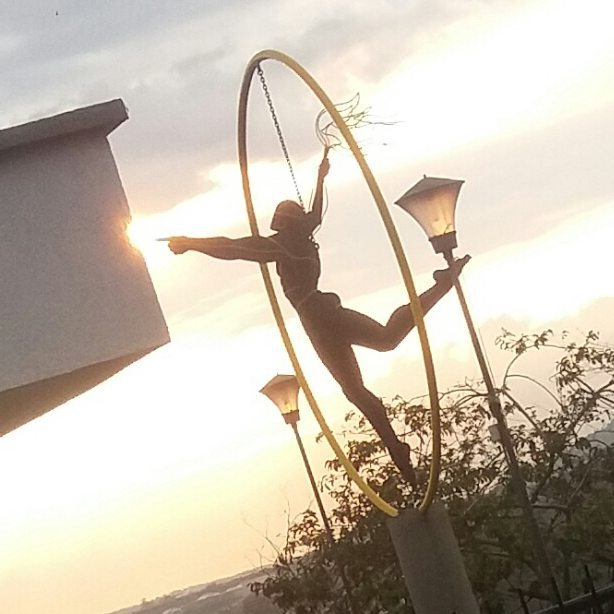